In [1]:
import numpy as np
import scipy as sp

In [2]:
data = np.array([2,3,3,4,4,4,4,5,5,6])
data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [3]:
np.sum(data), len(data)

(40, 10)

In [4]:
mu = np.sum(data) / len(data)
mu

4.0

In [5]:
np.mean(data)

4.0

In [8]:
data - mu

array([-2., -1., -1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.])

In [9]:
(data - mu) ** 2

array([4., 1., 1., 0., 0., 0., 0., 1., 1., 4.])

In [10]:
sigma2 = np.sum((data - mu)**2) / len(data)
sigma2

1.2

In [11]:
np.var(data)

1.2

In [12]:
sigma2 = np.sum((data - mu)**2) / (len(data) - 1)
sigma2

1.3333333333333333

In [13]:
np.var(data, ddof=1)

1.3333333333333333

In [15]:
sigma = np.sqrt(sigma2)
sigma

1.1547005383792515

In [16]:
np.std(data, ddof=1)

1.1547005383792515

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

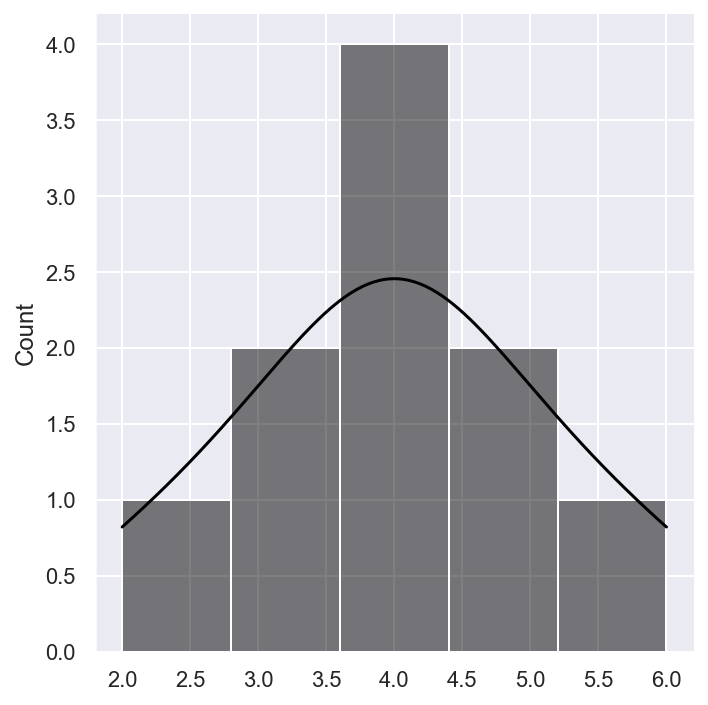

In [22]:
sns.displot(data, bins=5, color='black', kde=True)

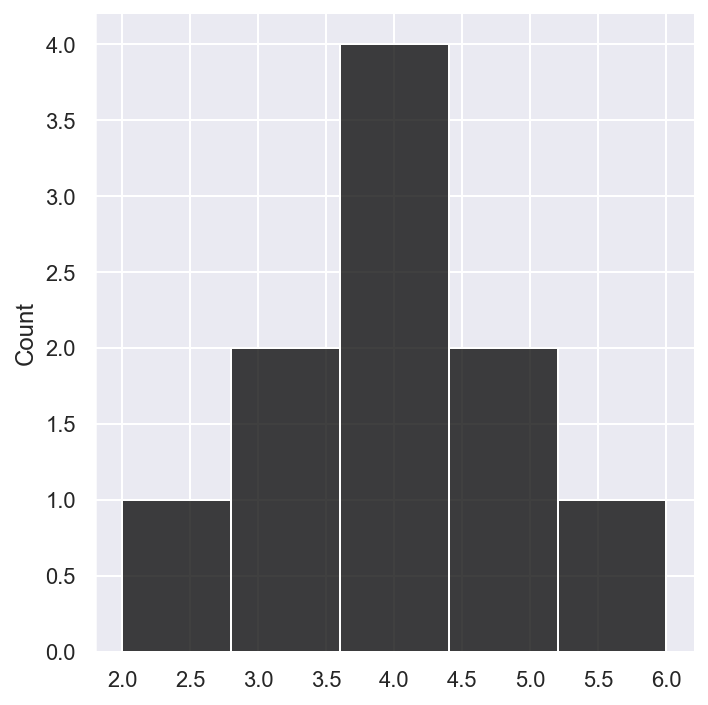

In [20]:
sns.displot(data, bins=5, color='black')

In [23]:
import pandas as pd

fish_multi = pd.read_csv('./datas/3-3-2-fish_multi_2.csv')
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [24]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [25]:
length_a = fish_multi.query('species == "A"')['length']
length_b = fish_multi.query('species == "B"')['length']

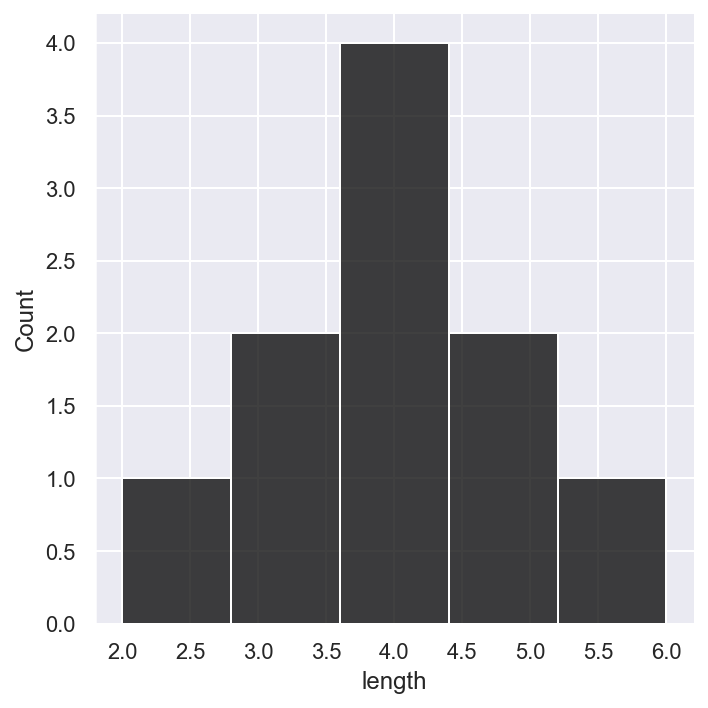

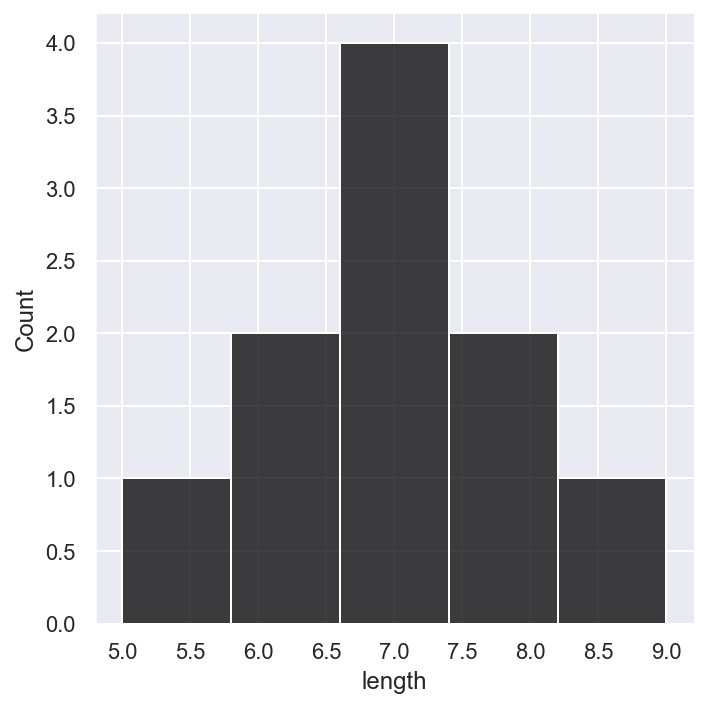

In [26]:
sns.displot(length_a, bins = 5, color = 'black', kde = False)
sns.displot(length_b, bins = 5, color = 'black', kde = False)

<AxesSubplot:xlabel='species', ylabel='length'>

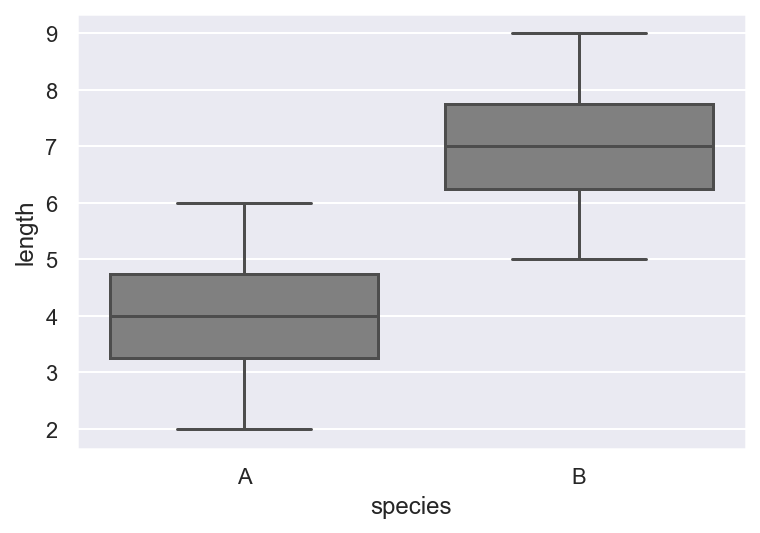

In [27]:
sns.boxplot(x='species', y='length', data=fish_multi, color='gray')

<AxesSubplot:xlabel='species', ylabel='length'>

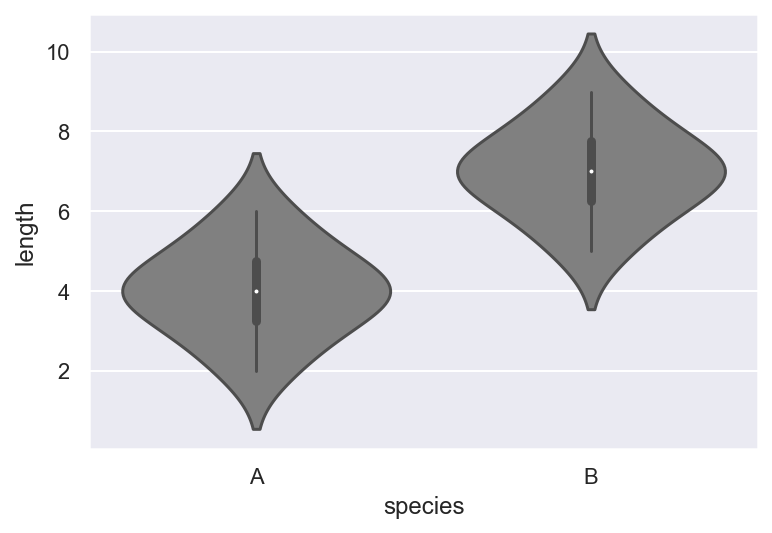

In [28]:
sns.violinplot(x='species', y='length', data=fish_multi, color='gray')

In [29]:
cov_data = pd.read_csv('./datas/3-2-3-cov.csv')
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


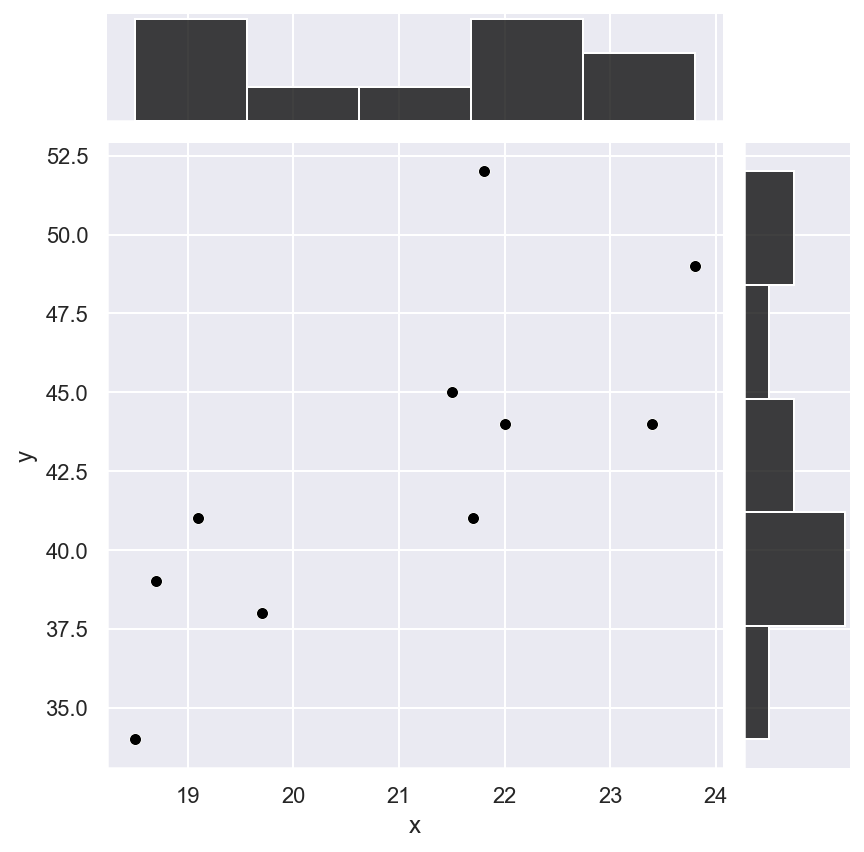

In [30]:
sns.jointplot(x='x', y='y', data=cov_data, color='black')

#### 통계기초

In [33]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [37]:
np.random.choice(fish_5, size=1, replace=False)

array([4])

In [39]:
np.random.choice(fish_5, size=3, replace=False)

array([6, 4, 2])

In [40]:
np.random.seed(13)
np.random.choice(fish_5, size=5, replace=False)

array([3, 5, 6, 2, 4])

In [42]:
np.random.seed(13)
data=(np.random.choice(fish_5, size=3, replace=False))
print(data)
np.mean(data)

[3 5 6]


4.666666666666667

In [43]:
fish_100000 = pd.read_csv('./datas/3-4-1-fish_length_100000.csv')['length']
fish_100000.head()

0    5.297442
1    3.505566
2    3.572546
3    3.135979
4    4.689275
Name: length, dtype: float64

In [44]:
sampling_result = np.random.choice(fish_100000, size=10, replace=False)
sampling_result

array([4.75108188, 4.37498586, 3.78013026, 2.96949093, 2.68097807,
       5.00637838, 4.31302466, 3.46929683, 5.16443516, 3.2858849 ])

In [45]:
np.mean(sampling_result)

3.9795686948818956

In [46]:
np.mean(fish_100000)

4.000000000000001

<AxesSubplot:xlabel='length'>

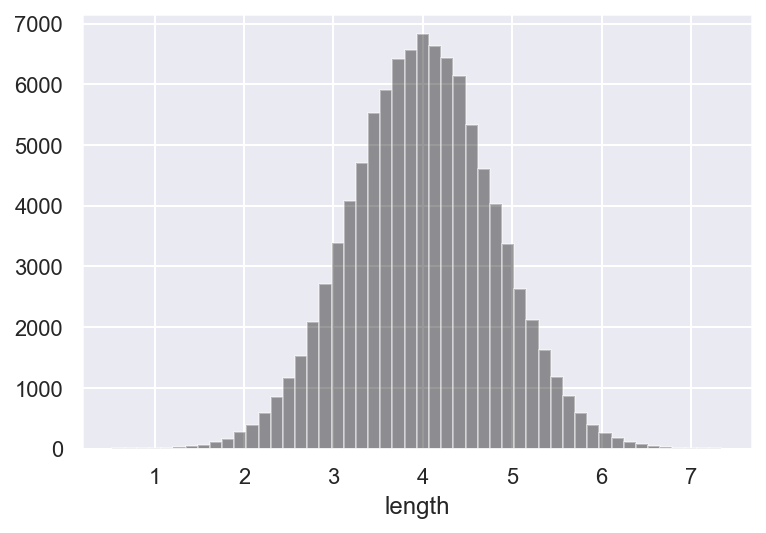

In [57]:
sns.distplot(fish_100000, kde=False, color='black')

In [48]:
np.mean(fish_100000)

4.000000000000001

In [49]:
np.var(fish_100000, ddof=0)

0.64

In [51]:
x = np.arange(1, 7.1, 0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [52]:
stats.norm.pdf(x=x, loc=4, scale=0.8)

array([4.40744603e-04, 6.98826903e-04, 1.09085337e-03, 1.67639859e-03,
       2.53631007e-03, 3.77782254e-03, 5.53981051e-03, 7.99765039e-03,
       1.13669531e-02, 1.59052270e-02, 2.19103756e-02, 2.97148760e-02,
       3.96745648e-02, 5.21512316e-02, 6.74887081e-02, 8.59828448e-02,
       1.07846649e-01, 1.33172835e-01, 1.61896995e-01, 1.93765332e-01,
       2.28311357e-01, 2.64845807e-01, 3.02463406e-01, 3.40068748e-01,
       3.76421790e-01, 4.10201211e-01, 4.40081658e-01, 4.64818867e-01,
       4.83335146e-01, 4.94797109e-01, 4.98677851e-01, 4.94797109e-01,
       4.83335146e-01, 4.64818867e-01, 4.40081658e-01, 4.10201211e-01,
       3.76421790e-01, 3.40068748e-01, 3.02463406e-01, 2.64845807e-01,
       2.28311357e-01, 1.93765332e-01, 1.61896995e-01, 1.33172835e-01,
       1.07846649e-01, 8.59828448e-02, 6.74887081e-02, 5.21512316e-02,
       3.96745648e-02, 2.97148760e-02, 2.19103756e-02, 1.59052270e-02,
       1.13669531e-02, 7.99765039e-03, 5.53981051e-03, 3.77782254e-03,
      

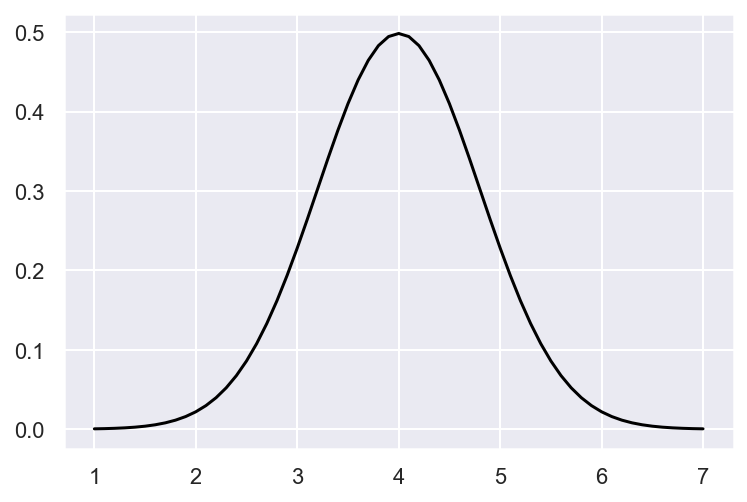

In [54]:
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8), color='black')

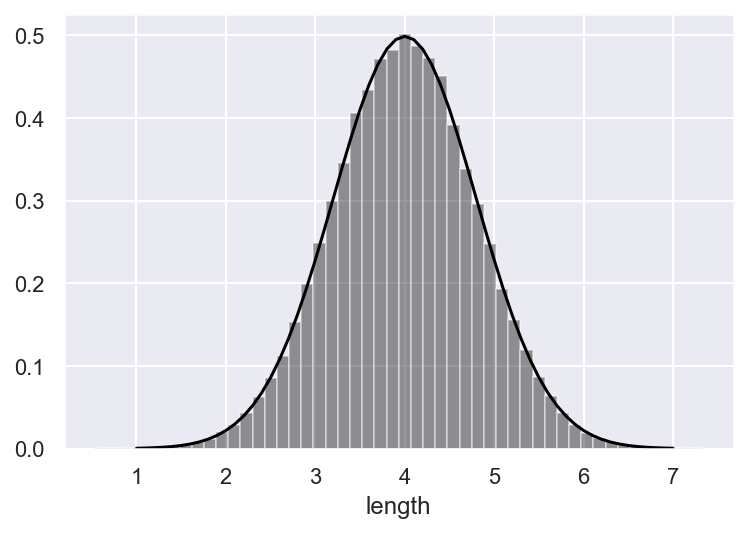

In [55]:
sns.distplot(fish_100000, kde=False, color='black', norm_hist=True)
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8), color='black')

#### 표본통계2

In [58]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
population = stats.norm(loc=4, scale=0.8)
type(population)

scipy.stats._distn_infrastructure.rv_frozen

In [60]:
sample_mean_array = np.zeros(10000)
np.random.seed(13)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample)

In [61]:
sample_mean_array

array([4.3976666 , 4.18857764, 3.8425394 , ..., 4.12495865, 4.12127892,
       4.05054023])

In [62]:
np.mean(sample_mean_array)

4.003651723722899

In [63]:
np.std(sample_mean_array, ddof=0)

0.25328735533634056

In [64]:
np.std(sample_mean_array, ddof=1)

0.25330002065401414

<AxesSubplot:ylabel='Density'>

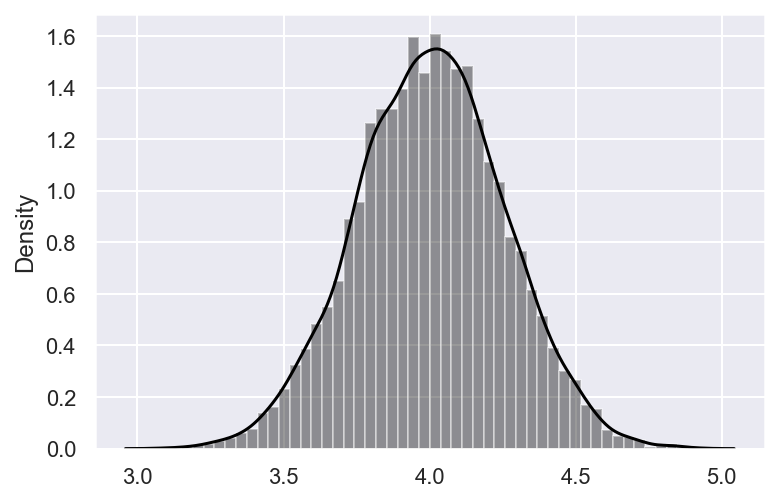

In [65]:
sns.distplot(sample_mean_array, color='black')

In [66]:
size_array = np.arange(10, 100100, 100)
sample_mean_array_size = np.zeros(len(size_array))

np.random.seed(13)
for i in range(0, len(size_array)):
    sample =population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

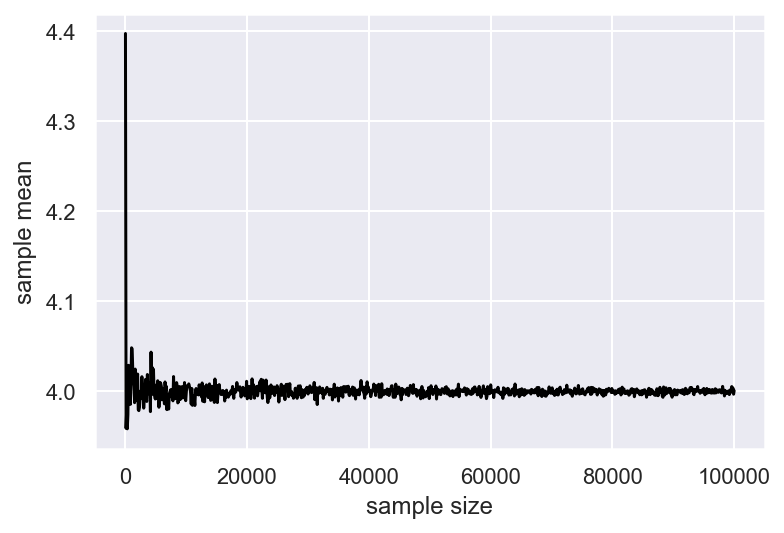

In [68]:
plt.plot(size_array, sample_mean_array_size, color='black')
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()

In [69]:
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)

In [70]:
size_array = np.arange(2, 102, 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [71]:
sample_mean_std_array = np.zeros(len(size_array))
np.random.seed(13)

for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)

Text(0, 0.5, 'mean_std value')

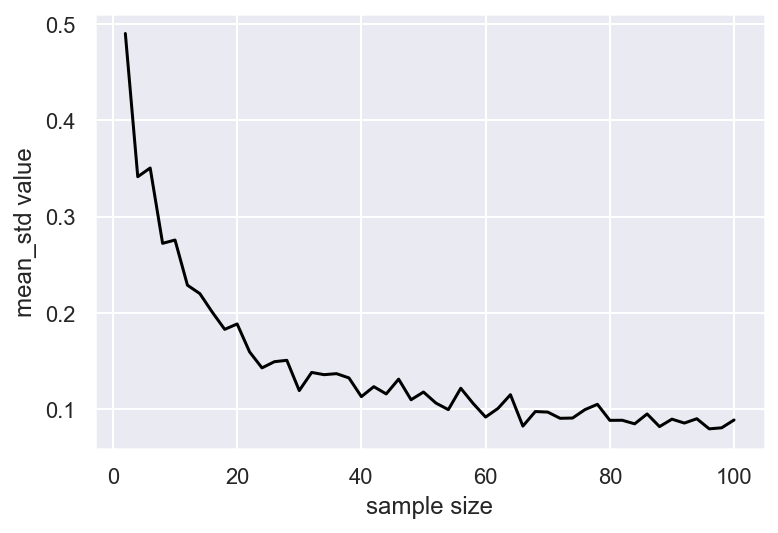

In [72]:
plt.plot(size_array, sample_mean_std_array, color='black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

In [73]:
SE = 0.8/np.sqrt(size_array)
SE

array([0.56568542, 0.4       , 0.32659863, 0.28284271, 0.25298221,
       0.23094011, 0.21380899, 0.2       , 0.18856181, 0.17888544,
       0.17056057, 0.16329932, 0.15689291, 0.15118579, 0.14605935,
       0.14142136, 0.13719887, 0.13333333, 0.12977714, 0.12649111,
       0.12344268, 0.12060454, 0.11795356, 0.11547005, 0.11313708,
       0.11094004, 0.10886621, 0.1069045 , 0.10504515, 0.10327956,
       0.1016001 , 0.1       , 0.09847319, 0.09701425, 0.09561829,
       0.0942809 , 0.09299811, 0.09176629, 0.09058216, 0.08944272,
       0.08834522, 0.08728716, 0.08626622, 0.08528029, 0.0843274 ,
       0.08340577, 0.0825137 , 0.08164966, 0.0808122 , 0.08      ])

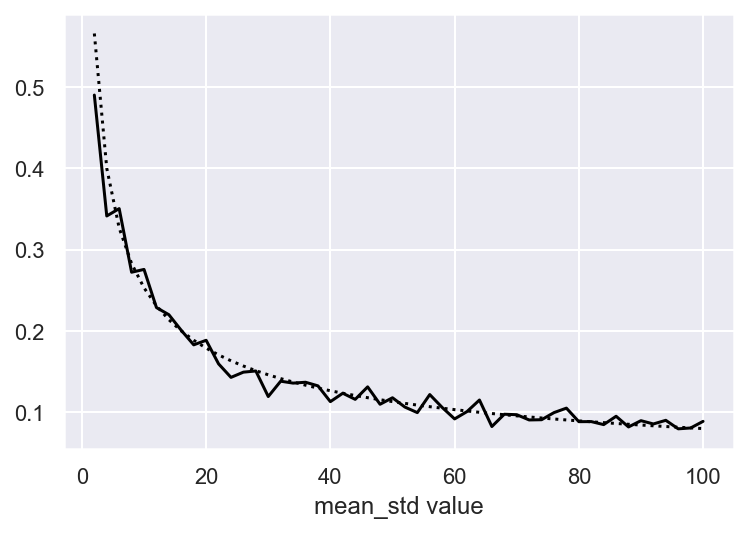

In [74]:
plt.plot(size_array, sample_mean_std_array, color = 'black')
plt.plot(size_array, SE, color='black', linestyle='dotted')
plt.xlabel('sample size')
plt.xlabel('mean_std value')
plt.show()

In [75]:
sample_var_array = np.zeros(10000)
np.random.seed(13)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_var_array[i]=np.var(sample, ddof=0)

np.mean(sample_var_array)

0.5792337629333761

In [76]:
unbias_var_array = np.zeros(10000)
np.random.seed(12)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    unbias_var_array[i] = np.var(sample, ddof=1)

np.mean(unbias_var_array)

0.6367506890584265

In [77]:
size_array = np.arange(10, 100100, 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [78]:
unbias_var_array_size = np.zeros(len(size_array))
np.random.seed(13)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof=1)

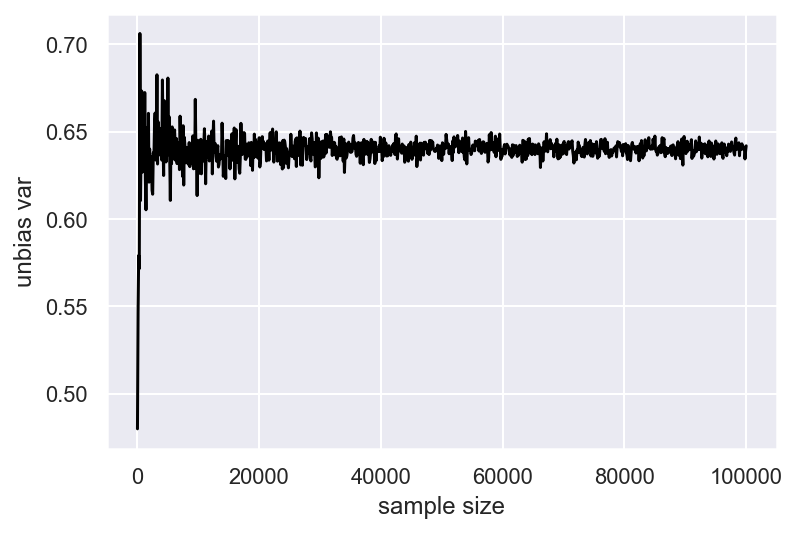

In [79]:
plt.plot(size_array, unbias_var_array_size, color='black')
plt.xlabel('sample size')
plt.ylabel('unbias var')
plt.show()